In [27]:
import numpy as np
import matplotlib.pyplot as plt

import jax
from functools import partial
import jax.numpy as jnp

plt.rcParams['figure.figsize'] = [12, 8] # PDF 

import time
from tqdm import tqdm

from Dynamics import logistic_map, henon_map, lorentz_map
from Kernels import ext_kernel
from Losses import rho_comp

from Optimizer import main_flow, main_sos
from DataManager import get_curr_data, sample_points
from utils import get_predict_func, gen_traj, predict_series, get_pred_funcs, set_seed, hausdorff_distance, save_res, load_res
from notebook_utils import do_test, get_thetas, print_stats, get_latex_test, get_latex_train, get_latex_rho

jax.config.update("jax_enable_x64", True)


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
set_seed(0)

x_vec_0 = [0.5, 1.5, 2.5]

traj_train = jnp.array(gen_traj(lorentz_map(), x_vec_0, 1000))

X_train = traj_train[:-1]
Y_train = traj_train[1:]

In [ ]:
flow_para = {
    "lr": 0.5,
    "num_steps": 200
}

sos_para = {
    "N_samples": 200,
    "N_steps": 100,
    "lmbda": 1e-5,
    "eps": 1e-6,
    "sig": 1e-1
}

start_seed = 0

num_theta = 10
thetas_flow, losses_flow, thetas_sos, losses_sos = get_thetas(X_train, Y_train, start_seed, flow_para, sos_para, num_theta)


100%|██████████| 200/200 [01:25<00:00,  2.34it/s]


flow min 0.03713586995514229


100%|██████████| 100/100 [00:12<00:00,  7.70it/s]


found min 0.02009502889927539
sample min 0.02033078275129041


100%|██████████| 200/200 [01:24<00:00,  2.36it/s]


flow min 0.06418960315300348


100%|██████████| 100/100 [00:13<00:00,  7.68it/s]


found min 0.029787869970854364
sample min 0.03033992051822465


100%|██████████| 200/200 [01:24<00:00,  2.37it/s]


flow min 0.08529169013245919


100%|██████████| 100/100 [00:12<00:00,  8.16it/s]


found min 0.02899166049895774
sample min 0.029016845015221282


100%|██████████| 200/200 [01:19<00:00,  2.52it/s]


flow min 0.028235056987487073


100%|██████████| 100/100 [00:12<00:00,  8.20it/s]


found min 0.029651831793474304
sample min 0.029677780389451236


100%|██████████| 200/200 [01:17<00:00,  2.58it/s]


flow min 0.04371797497476737


100%|██████████| 100/100 [00:11<00:00,  8.42it/s]


found min 0.022295526916189856
sample min 0.022317615749317787


100%|██████████| 200/200 [01:05<00:00,  3.03it/s]


flow min 0.11696555329162128


100%|██████████| 100/100 [00:11<00:00,  9.08it/s]


found min 0.06577756149845393
sample min 0.06663477492944814


100%|██████████| 200/200 [01:12<00:00,  2.78it/s]


flow min 0.04035946814648117


100%|██████████| 100/100 [00:10<00:00,  9.15it/s]


found min 0.02694645848334376
sample min 0.026979276743805625


100%|██████████| 200/200 [01:11<00:00,  2.79it/s]


flow min 0.08239376919470787


100%|██████████| 100/100 [00:10<00:00,  9.25it/s]


found min 0.05533911830913407
sample min 0.05537393329837803


100%|██████████| 200/200 [01:15<00:00,  2.66it/s]


flow min 0.026494030596734386


100%|██████████| 100/100 [00:11<00:00,  8.81it/s]


found min 0.01304217469236868
sample min 0.013006999867427038


100%|██████████| 200/200 [01:14<00:00,  2.68it/s]


flow min 0.06272584578721885


100%|██████████| 100/100 [00:16<00:00,  6.25it/s]


found min 0.019733008929502915
sample min 0.019749559034996755


100%|██████████| 200/200 [02:57<00:00,  1.13it/s]


flow min 0.039171985404702014


100%|██████████| 100/100 [00:27<00:00,  3.59it/s]


found min 0.013566208645527378
sample min 0.01459093475541351


100%|██████████| 200/200 [02:52<00:00,  1.16it/s]


flow min 0.026189312551070265


100%|██████████| 100/100 [00:28<00:00,  3.50it/s]


found min 0.004735335529070794
sample min 0.004742590912401701


100%|██████████| 200/200 [02:57<00:00,  1.12it/s]


flow min 0.04369819193375968


100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


found min 0.013789047247956487
sample min 0.013789363596565019


 74%|███████▍  | 148/200 [02:00<00:39,  1.31it/s]

In [ ]:
theta_res = {
    "thetas_flow": thetas_flow,
    "losses_flow": losses_flow,
    "thetas_sos": thetas_sos,
    "losses_sos": losses_sos
}

save_res("Lorentz", theta_res)

# Testing

In [31]:
x_vec_0_test = [0.7, 1.1, 2.]


traj_test = jnp.array(gen_traj(lorentz_map(), x_vec_0_test, 1000))

X_test = traj_test[:-1]
Y_test = traj_test[1:]

In [32]:
res = load_res("Lorentz")

In [33]:
HD_losses_flow, deviate_steps_flow, mse_losses_flow = do_test(res['thetas_flow'], x_vec_0_test, traj_test, X_train, Y_train)
HD_losses_sos, deviate_steps_sos, mse_losses_sos = do_test(res['thetas_sos'], x_vec_0_test, traj_test, X_train, Y_train)

HD_losses_flow_train, deviate_steps_flow_train, mse_losses_flow_train = do_test(res['thetas_flow'], x_vec_0, traj_train, X_train, Y_train)
HD_losses_sos_train, deviate_steps_sos_train, mse_losses_sos_train = do_test(res['thetas_sos'], x_vec_0, traj_train, X_train, Y_train)


100%|██████████| 1000/1000 [01:16<00:00, 13.14it/s]


In [36]:
test_flow_res = {
    "HD_losses_flow": HD_losses_flow,
    "deviate_steps_flow": deviate_steps_flow,
    "mse_losses_flow": mse_losses_flow
}

test_sos_res = {
    "HD_losses_sos": HD_losses_sos,
    "deviate_steps_sos": deviate_steps_sos,
    "mse_losses_sos": mse_losses_sos
}

save_res("Lorentz", test_flow_res)
save_res("Lorentz", test_sos_res)

In [37]:
test_train_flow_res = {
    "HD_losses_flow_train": HD_losses_flow_train,
    "deviate_steps_flow_train": deviate_steps_flow_train,
    "mse_losses_flow_train": mse_losses_flow_train
}

test_train_sos_res = {
    "HD_losses_sos_train": HD_losses_sos_train,
    "deviate_steps_sos_train": deviate_steps_sos_train,
    "mse_losses_sos_train": mse_losses_sos_train
}

save_res("Lorentz", test_train_flow_res)
save_res("Lorentz", test_train_sos_res)

In [29]:
res = load_res("Lorentz")

In [4]:
res = load_res("Lorentz")

get_latex_test(res)
print()
get_latex_train(res)
print()
get_latex_rho(res)

MSE & $1.10 \ [0.93, 1.32] \times 10^{-1}$ & $8.48 \ [8.09, 15.37] \times 10^{-1}$ \\ HD & $6.32 \ [5.52, 6.44]$ & $3.72 \ [3.53, 4.32] \times 10^{1}$ \\ Deviation (0.1) & $1.00$ & $1.00$ \\ Deviation (0.25) & $3.32 \ [3.14, 3.46] \times 10^{2}$ & $1.00$ \\ 


In [15]:
get_latex_test(res)

MSE & $1.10 \ [0.93, 1.32] \times 10^{-1}$ & $5.26 \ [3.65, 7.05] \times 10^{-1}$ \\ HD & $6.32 \ [5.52, 6.44]$ & $2.31 \ [1.26, 3.41] \times 10^{1}$ \\ Deviation (0.1) & $1.00$ & $1.00$ \\ Deviation (0.25) & $3.32 \ [3.14, 3.46] \times 10^{2}$ & $1.00$ \\ 


In [16]:
get_latex_train(res)

MSE & $1.17 \ [1.07, 1.21] \times 10^{-13}$ & $3.18 \ [2.82, 5.22] \times 10^{-14}$ \\ HD & $7.38 \ [3.17, 9.25]$ & $1.41 \ [1.01, 3.26] \times 10^{1}$ \\ Deviation (0.1) & $5.57 \ [3.44, 7.41] \times 10^{2}$ & $2.40 \ [0.20, 3.48] \times 10^{2}$ \\ Deviation (0.25) & $3.71 \ [0.81, 5.79] \times 10^{2}$ & $2.98 \ [0.24, 3.63] \times 10^{2}$ \\ 


In [17]:
get_latex_rho(res)

Rho & $2.98 \ [2.07, 4.41] \times 10^{-2}$ & $8.96 \ [5.47, 12.38] \times 10^{-2}$ \\ 


In [14]:
res['losses_sos'].shape

(10, 3, 100)

# Y.idx 0

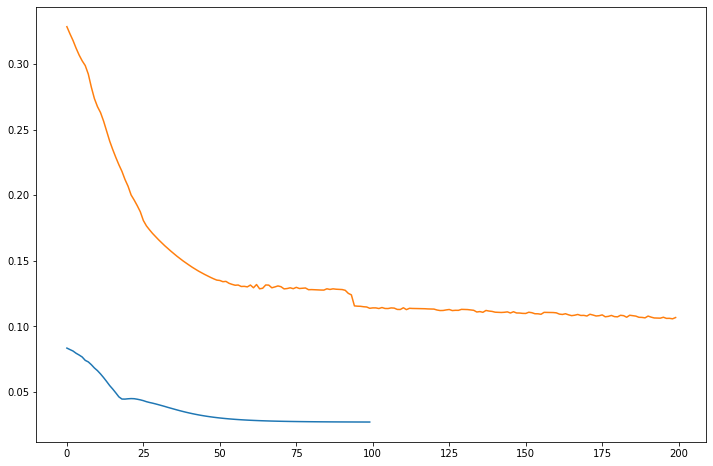

In [30]:
plt.plot(res["losses_sos"][9, 0])
plt.plot(res["losses_flow"][9, 1])

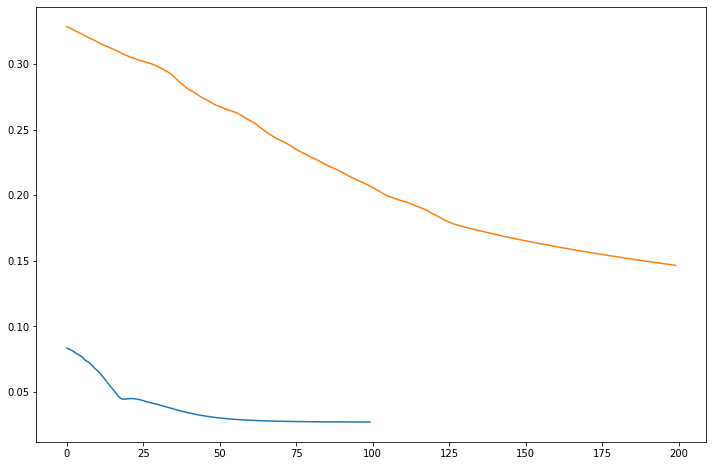

In [22]:
plt.plot(res["losses_sos"][9, 0])
plt.plot(res["losses_flow"][9, 1])

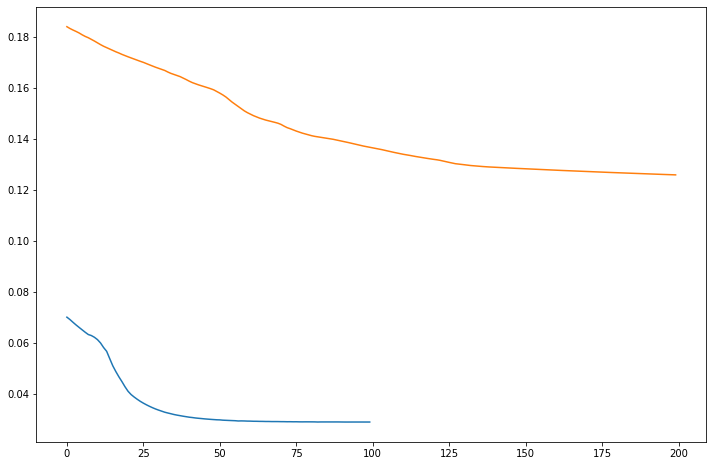

In [10]:
plt.plot(res["losses_sos"][0, 6])
plt.plot(res["losses_flow"][1, 6])

In [34]:
res["losses_flow"][:, 0, -1]

Array([0.03715616, 0.0738158 , 0.05706348, 0.04474346, 0.03471858,
       0.07459879, 0.10507163, 0.09161561, 0.11269999, 0.05889198],      dtype=float64)

In [23]:
y_idx = 0

lr = 0.5
num_steps = 200


seed = 1
set_seed(seed)

X_batch, y_batch, X_sub, y_sub = get_curr_data(X_train, Y_train, 1000, 500)

losses_flow_0, theta_star_flow_0 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, lr, num_steps)


N=100 
N_samples=200
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_0, theta_star_sos_0 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N_samples, N, lmbda, eps, sig)


100%|██████████| 200/200 [01:22<00:00,  2.41it/s]


flow min 0.06350136211167934


100%|██████████| 100/100 [00:12<00:00,  7.71it/s]


found min 0.02626165576724926
sample min 0.02707733916617394


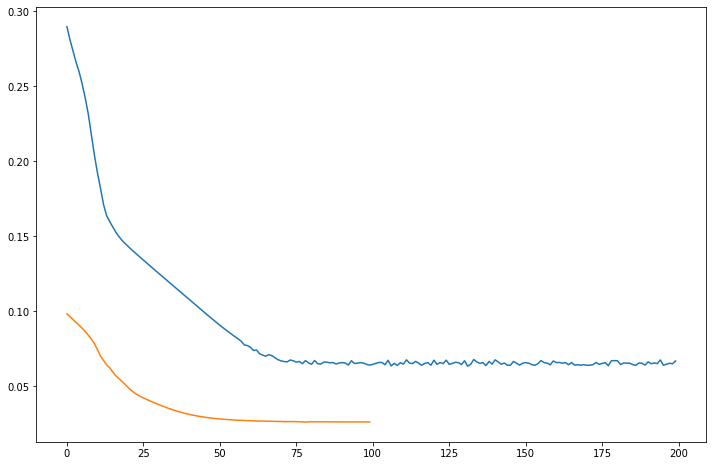

In [24]:
plt.plot(losses_flow_0)
plt.plot(losses_sos_0)

# Y.idx 1

In [49]:
y_idx = 1

lr = 10
num_steps = 200


seed = 1
set_seed(seed)

X_batch, y_batch, X_sub, y_sub = get_curr_data(X_train, Y_train, 1000, 500)

losses_flow_1, theta_star_flow_1 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, lr, num_steps)


N=100 
N_samples=200
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_1, theta_star_sos_1 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N_samples, N, lmbda, eps, sig)


100%|██████████| 200/200 [01:26<00:00,  2.31it/s]


flow min 0.0996814539775005


100%|██████████| 100/100 [00:14<00:00,  6.75it/s]


found min 0.10087551390548954
sample min 0.10106917540487226


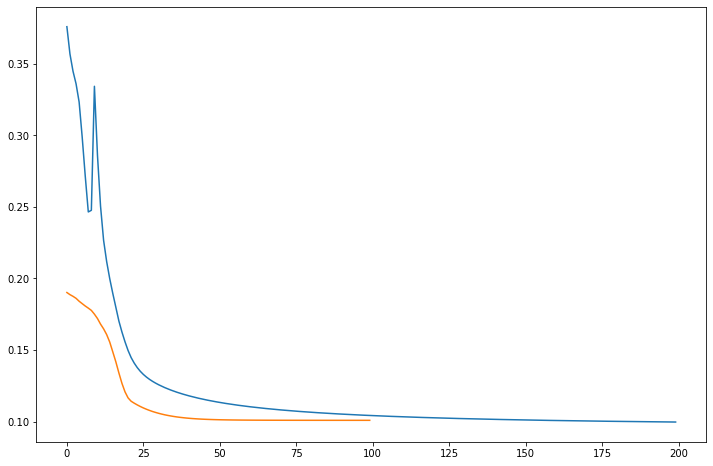

In [50]:
plt.plot(losses_flow_1)
plt.plot(losses_sos_1)

# Y.idx 2

In [71]:
y_idx = 2

lr = 0.1
num_steps = 200


seed = 1
set_seed(seed)

X_batch, y_batch, X_sub, y_sub = get_curr_data(X_train, Y_train, 1000, 500)

losses_flow_2, theta_star_flow_2 = main_flow(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, lr, num_steps)


N=100 
N_samples=200
lmbda=1e-4 
eps=1e-6
sig=1e-1
losses_sos_2, theta_star_sos_2 = main_sos(y_idx, ext_kernel, X_batch, y_batch, X_sub, y_sub, seed, N_samples, N, lmbda, eps, sig)


100%|██████████| 200/200 [01:21<00:00,  2.44it/s]


flow min 0.08029509416628355


100%|██████████| 100/100 [00:15<00:00,  6.58it/s]

found min 0.022763080906519573
sample min 0.02317663749862009


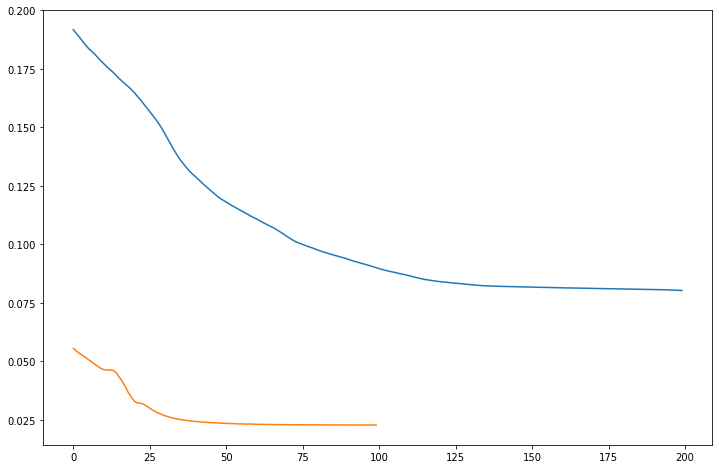

In [72]:
plt.plot(losses_flow_2)
plt.plot(losses_sos_2)

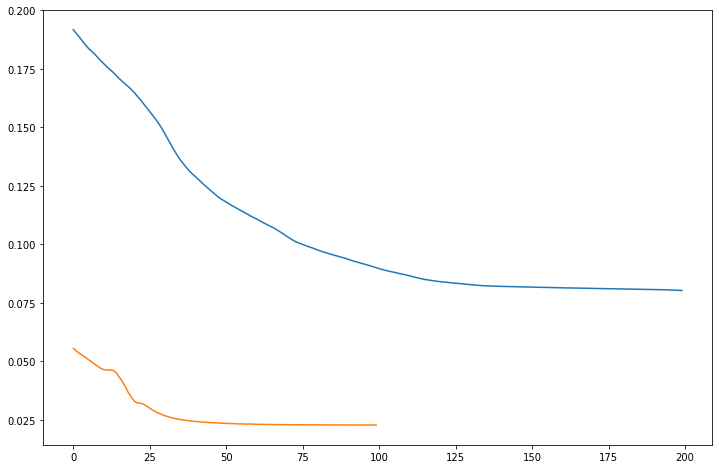

In [68]:
plt.plot(losses_flow_2)
plt.plot(losses_sos_2)

# Assessment

In [53]:
# x_vec_0_test = [0.5, 1.5, 2.5]

x_vec_0_test = [0.7, 1.1, 2.]


traj_test = jnp.array(gen_traj(lorentz_map(), x_vec_0_test, 1000))

X_test = traj_test[:-1]
Y_test = traj_test[1:]

In [54]:
thetas_flow = jnp.array([theta_star_flow_0, theta_star_flow_1, theta_star_flow_2])
thetas_sos = jnp.array([theta_star_sos_0, theta_star_sos_1, theta_star_sos_2])

pred_funcs_flow = get_pred_funcs(thetas_flow, ext_kernel, X_train, Y_train)
pred_funcs_sos = get_pred_funcs(thetas_sos, ext_kernel, X_train, Y_train)

# Autoregressive

In [55]:
traj_preds_flow = predict_series(pred_funcs_flow, jnp.array(x_vec_0_test), 1000)
traj_preds_sos = predict_series(pred_funcs_sos, jnp.array(x_vec_0_test), 1000)

100%|██████████| 1000/1000 [00:50<00:00, 19.65it/s]


In [56]:
print("flow", np.std(np.linalg.norm((traj_test - traj_preds_flow), axis=1)))
print("sos", np.std(np.linalg.norm((traj_test - traj_preds_sos), axis=1)))

flow 11.812312747540146
sos 11.737566509422892


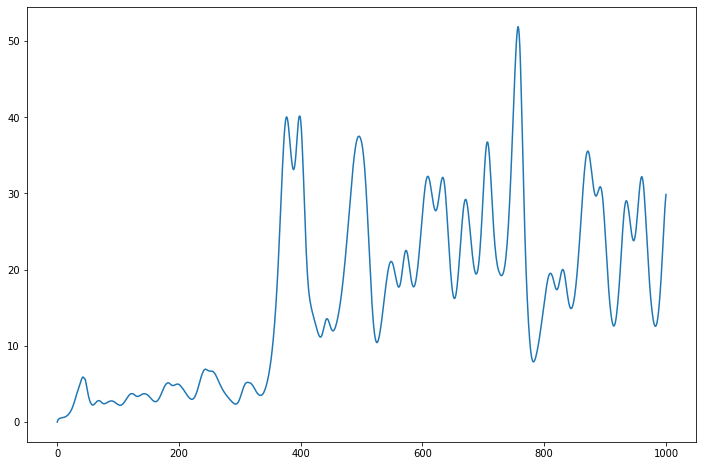

In [57]:
diff = np.linalg.norm((traj_test - traj_preds_sos), axis=1)

plt.plot(diff)
plt.show()

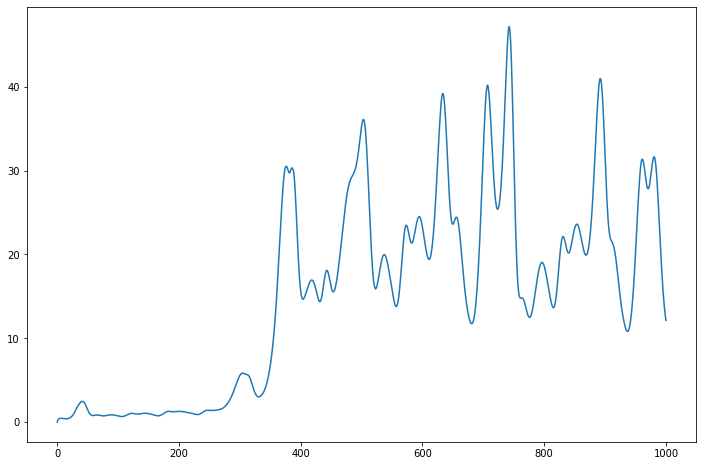

In [58]:
diff = np.linalg.norm((traj_test - traj_preds_flow), axis=1)

plt.plot(diff)
plt.show()

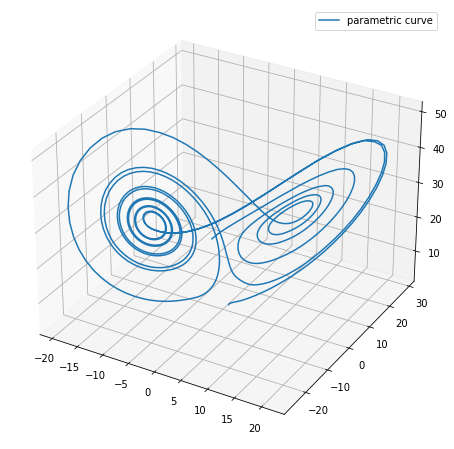

In [59]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_preds_flow[:, 0], traj_preds_flow[:, 1], traj_preds_flow[:, 2], label='parametric curve')
ax.legend()

plt.show()

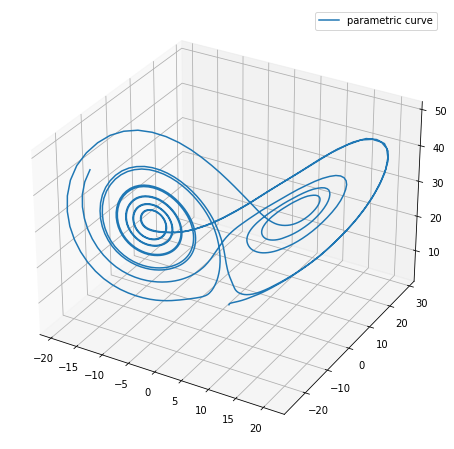

In [60]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_preds_sos[:, 0], traj_preds_sos[:, 1], traj_preds_sos[:, 2], label='parametric curve')
ax.legend()

plt.show()

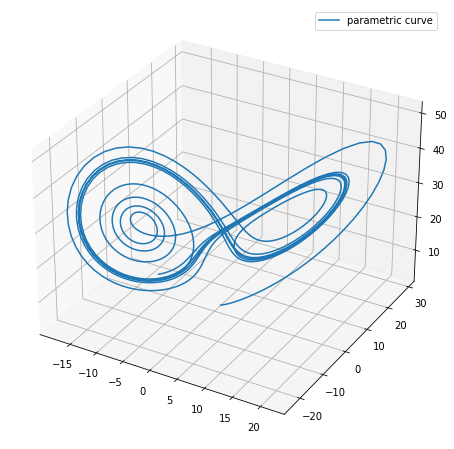

In [61]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(traj_test[:, 0], traj_test[:, 1], traj_test[:, 2], label='parametric curve')
ax.legend()

plt.show()

# Non-Autoregressive

In [62]:
res_flow = []
res_sos = []
for x in tqdm(X_test):
    curr_res_flow = []
    curr_res_sos = []
    for k in range(3):
        curr_res_flow.append(pred_funcs_flow[k](x))
        curr_res_sos.append(pred_funcs_sos[k](x))
    res_flow.append(curr_res_flow)
    res_sos.append(curr_res_sos)
    
res_flow = jnp.array(res_flow)
res_sos = jnp.array(res_sos)

print("sos", jnp.mean(jnp.linalg.norm(res_sos - Y_test, axis=1)))
print("flow", jnp.mean(jnp.linalg.norm(res_flow - Y_test, axis=1)))



100%|██████████| 1000/1000 [01:36<00:00, 10.32it/s]


sos 0.05731140665637234
flow 0.05504607181364618


In [63]:
hausdorff_distance(traj_test, traj_preds_sos)

Array(3.42846621, dtype=float64)

In [64]:
hausdorff_distance(traj_test, traj_preds_flow)

Array(4.6593854, dtype=float64)